In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
ima = cv2.imread('watch.jpg',0)
cv2.imshow('image',ima)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
cv2.imwrite('greywatch.jpg',ima)

True

# For video input

In [2]:
cap = cv2.VideoCapture(0)
while(True):
    ret , frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# video record

In [13]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))
while(True):
    ret,frame= cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow('image',gray)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()
    

# Drawing and writing

In [ ]:
ima = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
cv2.circle(ima,(200,30),55,(255,255,255),-1)
cv2.line(ima,(0,0),(255,240),(240,0,-1),10)
cv2.imshow('image',ima)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Shaping other type of designs

In [4]:
ima = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
# OpenCV documentation had this code, which reshapes the array to a 1 x 2. I did not 
# find this necessary, but you may:
#pts = pts.reshape((-1,1,2))
cv2.polylines(ima, [pts], True, (0,255,255), 3)

array([[[ 31,  27,  33],
        [ 31,  27,  33],
        [ 31,  27,  33],
        ...,
        [ 37,  33,  45],
        [ 38,  34,  46],
        [ 40,  36,  48]],

       [[ 32,  28,  34],
        [ 31,  27,  33],
        [ 30,  26,  32],
        ...,
        [ 34,  30,  42],
        [ 35,  31,  43],
        [ 35,  31,  43]],

       [[ 32,  30,  36],
        [ 30,  28,  34],
        [ 28,  26,  32],
        ...,
        [ 31,  27,  38],
        [ 32,  28,  40],
        [ 31,  27,  39]],

       ...,

       [[ 46,  54,  71],
        [ 42,  50,  67],
        [ 40,  48,  65],
        ...,
        [ 40,  62,  97],
        [ 37,  60,  92],
        [ 41,  64,  96]],

       [[ 35,  45,  62],
        [ 44,  54,  71],
        [ 48,  58,  75],
        ...,
        [ 39,  64,  98],
        [ 40,  65,  97],
        [ 37,  62,  94]],

       [[ 39,  49,  66],
        [ 34,  44,  61],
        [ 35,  45,  62],
        ...,
        [ 46,  71, 105],
        [ 47,  72, 106],
        [ 46,  71, 103]]

### writing on image

In [7]:
ima = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(ima,'Hello this is RCWORLD',(0,130),font,1,(200,155,124),1,cv2.LINE_AA)
cv2.imshow('image',ima)
cv2.waitKey(0)
cv2.destroyAllWindows()

# BASIC OPERATIONS

In [2]:
ima = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)

In [3]:
px = ima[55,55]

In [4]:
px

array([29, 31, 42], dtype=uint8)

In [5]:
ima[55,55] = [255,255,253]

In [6]:
px = ima[55,55]

In [7]:
px

array([255, 255, 253], dtype=uint8)

In [8]:
px = ima[149:150,149:150]
px

array([[[107, 117, 141]]], dtype=uint8)

In [9]:
ima[100:150,100:150] = [255,255,255]

In [10]:
cv2.imshow('ima',ima)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
print(ima.shape)

(168, 300, 3)


In [12]:
print(ima.size)

151200


In [13]:
print(ima.dtype)

uint8


In [ ]:
ima_face = ima[110:180,110:180]
ima[0:58,0:70] = ima_face
cv2.imshow('image',ima)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image arithmetic and logical operations

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as pyt

In [12]:
im1 = cv2.imread('3D-Matplotlib.png',cv2.IMREAD_COLOR)
im2 = cv2.imread('mainsvmimage.png',cv2.IMREAD_COLOR)
cv2.imshow('image1',im1)
cv2.imshow('image2',im2)
#normal addition
add = im1 + im2
cv2.imshow('added',add)
#adding in cv2
add =cv2.add(im1,im2)
cv2.imshow('newadded',add)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [14]:
im1 = cv2.imread('3D-Matplotlib.png',cv2.IMREAD_COLOR)
im2 = cv2.imread('mainsvmimage.png',cv2.IMREAD_COLOR)

weighted = cv2.addWeighted(im1,0.6,im2,0.4,0)
cv2.imshow('weighted image',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

# merging 2 images having first image with just a specific logo type part of second(using threshold)

In [2]:
im1 = cv2.imread('3D-Matplotlib.png',cv2.IMREAD_COLOR)
imlogo = cv2.imread('mainlogo.png',cv2.IMREAD_COLOR)
rows,columns,channels = imlogo.shape
roi = im1[0:rows,0:columns]
imlogo2gray = cv2.cvtColor(imlogo,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(imlogo2gray,220,255,cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
im1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)

imlogo_fg = cv2.bitwise_and(imlogo,imlogo,mask = mask)

dst = cv2.add(im1_bg,imlogo_fg)
im1[0:rows,0:columns]= dst

cv2.imshow('image',im1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
cv2.imshow('image',imlogo_fg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Threshold

In [6]:
im1 = cv2.imread('bookpage.jpg')
im1_gs = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY) 
ret, threshold = cv2.threshold(im1,10,255,cv2.THRESH_BINARY)
ret1 , threshold1 = cv2.threshold(im1_gs,10,255,cv2.THRESH_BINARY)
cv2.imshow('original',im1)
cv2.imshow('original1',im1_gs)
cv2.imshow('new',threshold)
cv2.imshow('newest',threshold1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
th = cv2.adaptiveThreshold(im1_gs,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
cv2.imshow('newest_yeh',th)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
ret2, th2 = cv2.threshold(im1_gs,150,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('newest_yeh2',th2)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'im1_gs' is not defined

# Color filter 

In [2]:
cap = cv2.VideoCapture(0)
while(1):
    _,frame = cap.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv,lower_red,upper_red)
    res = cv2.bitwise_and(frame,frame,mask = mask)
    cv2.imshow('first',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k ==27:
        break
cv2.destroyAllWindows()
cap.release()

In [ ]:
cap = cv2.VideoCapture(0)
while(1):
    _,frame = cap.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv , lower_red , upper_red)
    res = cv2.bitwise_and(frame,frame,mask = mask)
    
    kernel = np.ones((15,15),np.float32)/225
    smoothened = cv2.filter2D(res , -1,kernel)
    bluer = cv2.GaussianBlur(res , (15,15),0)
    mbr = cv2.medianBlur(res,15)
    bfl= cv2.bilateralFilter(res,15,75,75)
    cv2.imshow("bilateral",bfl)
    cv2.imshow('mbr',mbr)
    cv2.imshow('main',frame)
    cv2.imshow('bluer',bluer)
    cv2.imshow('res', res)
    cv2.imshow('smoothened',smoothened)
    k=cv2.waitKey(5) & 0xFF
    if k ==27:
        break
cv2.destroyAllWindows()
cap.release()

# Morphological Transformations

### NOTE -
    EROISION : If all pixels white then white otherwise black

    DILATION : if entire not black, convert to white
    
    OPENING : Remove false +ve
    
    CLOSING : Remove false -ve

In [8]:
cap = cv2.VideoCapture(0)
while(1):
    _,frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_color = np.array([30,150,50])
    upper_color = np.array([255,255,180])
    
    mask = cv2.inRange(hsv,lower_color,upper_color)
    res = cv2.bitwise_and(frame, frame ,mask = mask)
    
    kernel   = np.ones ((5,5),np.uint8)
    erosion = cv2.erode(mask ,kernel , iterations  =1 )
    dilation = cv2.dilate(mask , kernel , iterations = 1)
    
    opening= cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)
    closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)
    
    
    cv2.imshow('original', frame)
    cv2.imshow('opening', opening)
    cv2.imshow('closing', closing)
    
    cv2.imshow('Mask',mask)
    cv2.imshow('Erosion',erosion)
    cv2.imshow('dilation',dilation)
    
    k = cv2.waitKey(5) &0xFF
    if k ==27:
        break
cv2.destroyAllWindows()
cap.release()

###  NOTE:

    It is the difference between input image and Opening of the image
    cv2.imshow('Tophat',tophat)

    # It is the difference between the closing of the input image and input image.
    cv2.imshow('Blackhat',blackhat)

# IMAGE GRADIENT AND EDGE DETECTION

In [2]:
cam = cv2.VideoCapture(0)
while(1):
    _ , frame = cam.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(frame,lower_red , upper_red)
    restore = cv2.bitwise_and(frame,frame,mask = mask)
    
    laplacian = cv2.Laplacian(frame , cv2.CV_64F)
    sobelx= cv2.Sobel(frame , cv2.CV_64F,1,0,ksize = 5)
    sobely = cv2.Sobel(frame , cv2.CV_64F,0,1,ksize = 5)
    
    edges = cv2.Canny(frame, 100,200)
    cv2.imshow('original',frame)
    cv2.imshow('canny',edges)
    cv2.imshow('mask',mask)
    cv2.imshow('restore',restore)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)
    
    k = cv2.waitKey(5) & 0xff
    if k ==27:
        break
cv2.destroyAllWindows()
cam.release()

# TEMPLATE MATCHING (image matching)

In [5]:
main_img = cv2.imread('mainimg.jpg')
main_gray = cv2.cvtColor(main_img,cv2.COLOR_BGR2GRAY)
template = cv2.imread('matchimg.jpg',0)
w,h= template.shape[::-1]

In [6]:
res =cv2.matchTemplate(main_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)

564 123
565 123
564 124
565 124
566 124
564 125
565 125
562 173
563 173
564 173
562 174
563 174
564 174
562 175
563 175
564 175
560 221
559 222
560 222
559 223
560 223
557 268


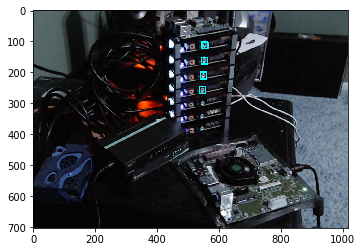

In [7]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(main_img,pt,(pt[0]+w , pt[1] + h),(0,255,255),2)
    print (pt[0] + w , pt[1] + h)
#cv2.imshow('detected', main_img)
plt.imshow(main_img)
plt.show()


# GRABCUT FOREGROUND EXTRACTION 

In [8]:
img  = cv2.imread('grabcut.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdmodel = np.zeros((1,65),np.float64)
fgdmodel = np.zeros((1,65),np.float64)
rect = (161,79,150,150)

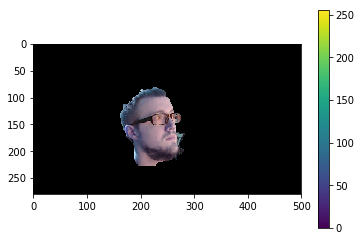

In [9]:
cv2.grabCut(img,mask,rect,bgdmodel,fgdmodel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask ==2)|(mask ==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

# CORNER DETECTION

In [2]:
img = cv2.imread('corner.jpg')    
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)


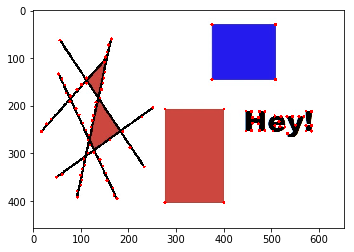

In [3]:
for corner in corners :
    x,y = corner.ravel()
    cv2.circle(img , (x,y), 3,255,-1)
plt.imshow(img)   
plt.show()
#cv2.imshow('image',img)

# FEATURE MATCHING BRUTE FORCE

In [6]:
imo = cv2.imread('matchtori.jpg',0)
imt = cv2.imread('matchtemplate.jpg',0)
cv2.imshow('ori',imt)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
orb = cv2.ORB_create()
#detector to detect

In [8]:
keyp1, des1 = orb.detectAndCompute(imo,None)
keyp2 , des2 = orb.detectAndCompute(imt,None)
print(des1)

[[ 60 255  81 ... 255 206 164]
 [ 84  92 187 ... 241  39 243]
 [  5 191 212 ... 248 155 169]
 ...
 [ 60 226 201 ... 187  82 176]
 [175 222 116 ... 191  88 157]
 [223  38 230 ... 245 171 157]]


In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck =True)

In [10]:
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

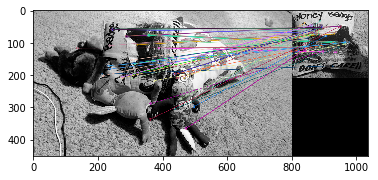

In [11]:
im3 = cv2.drawMatches(imo,keyp1, imt,keyp2,matches[:50],None,flags = 2)
plt.imshow(im3)
plt.show()

# MOG BACKGROUND REDUCTION

In [5]:
#cap = cv2.VideoCapture('people-walking.mp4')
cap =cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret,frame = cap.read()
    fgmask = fgbg.apply(frame)
    cv2.imshow('main',frame)
    cv2.imshow('fgmask',fgmask)
    k = cv2.waitKey(30) & 0xFF
    if (k ==27):
        break
cv2.destroyAllWindows()
cap.release()

# HAAR CASCADE FACE EYE DETECTION

In [5]:

facecascade = cv2.CascadeClassifier('haarcascadeface.xml')
eyecascade = cv2.CascadeClassifier('haarcascadeeye.xml')
cap = cv2.VideoCapture(0)

while(1):
    ret , img = cap.read()
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = facecascade.detectMultiScale(gray , 1.3,5)
    for(x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+y,w+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = gray[y:y+h,x:x+w]
        eyes = eyecascade.detectMultiScale(roi_gray)
        for(ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+ew),(0,255,0),2)
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xFF
    if(k ==27):
        break
cap.release()
cv2.destroyAllWindows()
